# Assignment 1 Part B

In [16]:
#Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import MeanSquaredError, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from seaborn import heatmap

import sklearn
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold


In [2]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [4]:
downloaded = drive.CreateFile({'id':"1SUVHYr4OTrIOLsU8x28E676uRZSYTLjY"})   # replace the id with id of file you want to access
downloaded.GetContentFile('admission_predict.csv')        # replace the file name with your file

In [5]:
#Set Variables
NUM_CLASSES = 7

epochs = 10000
batch_size = 8
num_neurons = 10
seed = 10

histories={}

np.random.seed(seed)
tf.random.set_seed(seed)


In [6]:
#Additional Variables
learningRate = 10**(-3) #As defined in the assignment
decay = 10**(-3) #As defined in the assignment

#Set learning rate
opt = tf.keras.optimizers.SGD(learning_rate=learningRate)

In [7]:
#read and divide data into test and train sets 
admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')
X_data, Y_data = admit_data[1:,1:8], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)

idx = np.arange(X_data.shape[0])
np.random.shuffle(idx)
X_data, Y_data = X_data[idx], Y_data[idx]

X_data = (X_data- np.mean(X_data, axis=0))/ np.std(X_data, axis=0)

In [38]:
#Function
#MODEL
def regressModel(trainX,trainY, testX, testY,epochs,batch_size,decay,num_neurons):
  # create a network
  regn_model = keras.Sequential([
      keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(decay)),
      keras.layers.Dense(1, activation='linear')
  ])

  regn_model.compile(optimizer='sgd',
                loss=keras.losses.MeanSquaredError(),
                metrics=['mse'])

  # learn the network for train
  result = regn_model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose = 2, validation_data=(testX, testY))
  return result, regn_model

def layers4Model(trainX,trainY, testX, testY,epochs,batch_size,decay,num_neurons, dropouts):
  #Variables
  keep = 0.8
  # Select model based on dropouts
  if dropouts:
    regn_model = keras.Sequential([
        keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(decay)),
        Dropout(1-keep),
        keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(decay)),
        Dropout(1-keep),
        keras.layers.Dense(1, activation='linear')
    ])
  else:
    regn_model = keras.Sequential([
        keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(decay)),
        keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(decay)),
        keras.layers.Dense(1, activation='linear')
    ])

  regn_model.compile(optimizer='sgd',
                loss=keras.losses.MeanSquaredError(),
                metrics=['mse'])

  # learn the network for train
  result = regn_model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose = 2, validation_data=(testX, testY))
  return result, regn_model

def layers5Model(trainX,trainY, testX, testY,epochs,batch_size,decay,num_neurons, dropouts):
  #Variables
  keep = 0.8
  # Select model based on dropouts
  if dropouts:
    regn_model = keras.Sequential([
        keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(decay)),
        Dropout(1-keep),
        keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(decay)),
        Dropout(1-keep),
        keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(decay)),
        Dropout(1-keep),
        keras.layers.Dense(1, activation='linear')
    ])
  else:
    regn_model = keras.Sequential([
        keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(decay)),
        keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(decay)),
        keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(decay)),
        keras.layers.Dense(1, activation='linear')
    ])

  regn_model.compile(optimizer='sgd',
                loss=keras.losses.MeanSquaredError(),
                metrics=['mse'])

  # learn the network for train
  result = regn_model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose = 2, validation_data=(testX, testY))
  return result, regn_model

In [9]:
# experiment with small datasets
trainX,testX,trainY,testY=train_test_split(X_data, Y_data,train_size=0.7)

#Check shape of train set
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(280, 7)
(280, 1)
(120, 7)
(120, 1)


## Part B Q1

In [ ]:
# learn the network for train
histories['regn_train'], modelUsed = regressModel(trainX,trainY,testX,testY,epochs,batch_size,decay, num_neurons)

Streaming output truncated to the last 5000 lines.
35/35 - 0s - loss: 0.0032 - mse: 0.0030 - val_loss: 0.0042 - val_mse: 0.0039
Epoch 7502/10000
35/35 - 0s - loss: 0.0032 - mse: 0.0030 - val_loss: 0.0042 - val_mse: 0.0039
Epoch 7503/10000
35/35 - 0s - loss: 0.0032 - mse: 0.0030 - val_loss: 0.0042 - val_mse: 0.0039
Epoch 7504/10000
35/35 - 0s - loss: 0.0032 - mse: 0.0030 - val_loss: 0.0042 - val_mse: 0.0039
Epoch 7505/10000
35/35 - 0s - loss: 0.0032 - mse: 0.0030 - val_loss: 0.0042 - val_mse: 0.0039
Epoch 7506/10000
35/35 - 0s - loss: 0.0032 - mse: 0.0030 - val_loss: 0.0042 - val_mse: 0.0039
Epoch 7507/10000
35/35 - 0s - loss: 0.0032 - mse: 0.0030 - val_loss: 0.0042 - val_mse: 0.0039
Epoch 7508/10000
35/35 - 0s - loss: 0.0032 - mse: 0.0030 - val_loss: 0.0042 - val_mse: 0.0039
Epoch 7509/10000
35/35 - 0s - loss: 0.0032 - mse: 0.0030 - val_loss: 0.0042 - val_mse: 0.0039
Epoch 7510/10000
35/35 - 0s - loss: 0.0032 - mse: 0.0030 - val_loss: 0.0042 - val_mse: 0.0039
Epoch 7511/10000
35/35 - 0

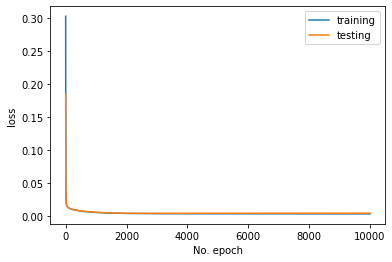

In [ ]:
# plot learning curves
plt.plot(histories['regn_train'].history['loss'], label='training')
plt.plot(histories['regn_train'].history['val_loss'], label='testing')
plt.ylabel('loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [22]:
#No of epoch where test error is minimum
epochs = 1700

In [ ]:
# experiment with any 50 datasets
ranX,ranTestX,ranY,ranTestY=train_test_split(X_data, Y_data,train_size=50/400)

# predicted and target values for any 50 samples
train50X, test50X, train50Y, test50Y = train_test_split(X_data, Y_data, test_size=50)
print(test50X.shape, test50Y.shape)
print()
pred50y = modelUsed.predict(x=test50X)
print('Mean Squared Error: ', np.mean(mean_squared_error(test50Y, pred50y)))

(50, 7) (50, 1)

Mean Squared Error:  0.004179213


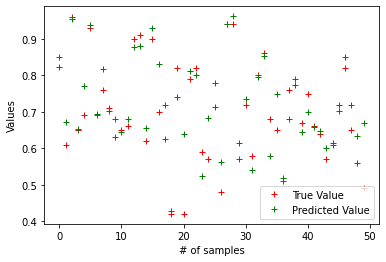

In [ ]:
plt.figure()
plt.plot(test50Y, 'r+')
plt.plot(pred50y, 'g+')
plt.xlabel('# of samples')
plt.ylabel('Values')
plt.legend(['True Value', 'Predicted Value'], loc='lower right')

# Part B Q2

In [12]:
# load data into a dataframe format
df_og = pd.read_csv('admission_predict.csv')

In [13]:
# drop the serial no. column
df = df_og.drop(columns="Serial No.")
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


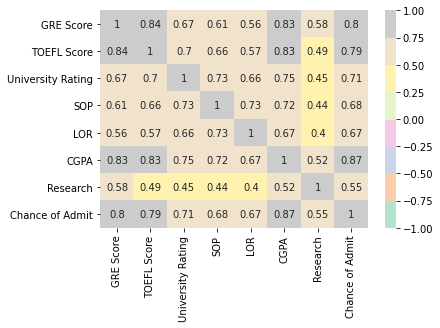

In [ ]:
# check the correlation matrix to see the relationship between 2 predictor variables
corr = df.corr()

# plot a heatmap of the relations of 2 variables
ax = heatmap(
    corr,
    vmin=-1,vmax=1,center=0,
    cmap='Pastel2',
    annot=True
)

In [ ]:
# get most correlated features
max_corr_extent=0
max_corr_index=(-1,-1)
for i in range(len(corr)-1):
    for j in range(i+1, len(corr)-1):
        if corr.iloc[i,j] > max_corr_extent:
            max_corr_extent = corr.iloc[i,j]
            max_corr_index=(i,j)
            
corr.columns[max_corr_index[0]], corr.columns[max_corr_index[1]], max_corr_extent

('GRE Score', 'TOEFL Score', 0.8359768030143953)

In [ ]:
##Get MSE value of each predictor value

predictors = list(df.columns)[:-1]
print('All predictors: {}\n'.format(predictors, '\n'))

mse = dict(zip(predictors, [0 for i in predictors]))

for i in range(len(predictors)):
    
    excluded_predictor = predictors[i]
    
    print(f'\nremoved {excluded_predictor}...')
    print(f'feature kept: {[x for x in predictors if x!=excluded_predictor]}')
    
    trainXremoved, testXremoved = np.delete(trainX, obj=i, axis=1), np.delete(testX, obj=i, axis=1)
    
    print(f'training shape: {trainXremoved.shape}')
    
    model = Sequential([
    Dense(num_neurons, input_dim=trainXremoved.shape[1], activation='relu', kernel_regularizer=regularizers.l2(decay)),
    Dense(trainY.shape[1], kernel_regularizer=regularizers.l2(decay))
    ])

    model.compile(optimizer='sgd',loss='mse')

    h = model.fit(trainXremoved, trainY, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(testXremoved, testY), shuffle=True)
    
    mse[excluded_predictor] = h.history['val_loss'][-1]
    
    print(f'MSE: {mse[excluded_predictor]}')

print()    
mse

All predictors: ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']


removed GRE Score...
feature kept: ['TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
training shape: (280, 6)
MSE: 0.004801499657332897

removed TOEFL Score...
feature kept: ['GRE Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
training shape: (280, 6)
MSE: 0.0046178908087313175

removed University Rating...
feature kept: ['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA', 'Research']
training shape: (280, 6)
MSE: 0.005180530250072479

removed SOP...
feature kept: ['GRE Score', 'TOEFL Score', 'University Rating', 'LOR', 'CGPA', 'Research']
training shape: (280, 6)
MSE: 0.004925779066979885

removed LOR...
feature kept: ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA', 'Research']
training shape: (280, 6)
MSE: 0.00505888881161809

removed CGPA...
feature kept: ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'Research']
tr

{'CGPA': 0.006090194918215275,
 'GRE Score': 0.004801499657332897,
 'LOR': 0.00505888881161809,
 'Research': 0.004610109142959118,
 'SOP': 0.004925779066979885,
 'TOEFL Score': 0.0046178908087313175,
 'University Rating': 0.005180530250072479}

In [ ]:
# Eliminate the predictor variable with the least MSE value
eliminate1_ = min(mse, key=mse.get)
print(f'removing {eliminate1_}')

#feature1 - features after removing 1 feature
eliminate1 = list(df.columns)[:-1]
eliminate1.remove(eliminate1_)
print(eliminate1)

remove_feature_col=np.argmin(list(mse.values()))
trainX1, testX1 = np.delete(trainX, obj=remove_feature_col, axis=1), np.delete(testX, obj=remove_feature_col, axis=1)
print(trainX1.shape," ", testX1.shape)

removing Research
['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']
(280, 6)   (120, 6)


In [ ]:
# Removing the second feature
mse_eliminate1 = dict(zip(eliminate1, [0 for i in eliminate1]))

for i in range(len(eliminate1)):
    
    excluded_feature = eliminate1[i]
    
    print(f'\nremoved {excluded_feature}...')
    print(f'feature kept: {[f for f in eliminate1 if f!=excluded_feature]}')
    
    trainXremoved, testXremoved = np.delete(trainX1, obj=i, axis=1), np.delete(testX1, obj=i, axis=1)
    
    print(f'training shape: {trainXremoved.shape}')
    
    model = Sequential([
    Dense(num_neurons, input_dim=trainXremoved.shape[1], activation='relu', kernel_regularizer=regularizers.l2(decay)),
    Dense(trainY.shape[1], kernel_regularizer=regularizers.l2(decay))
    ])

    model.compile(optimizer='sgd',loss='mse')

    h = model.fit(trainXremoved, trainY, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(testXremoved, testY), shuffle=True)
    
    mse_eliminate1[excluded_feature] = h.history['val_loss'][-1]
    
    print(f'MSE: {mse_eliminate1[excluded_feature]}')
    
print(f'\n{mse_eliminate1}')


removed GRE Score...
feature kept: ['TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']
training shape: (280, 5)
MSE: 0.004766029305756092

removed TOEFL Score...
feature kept: ['GRE Score', 'University Rating', 'SOP', 'LOR', 'CGPA']
training shape: (280, 5)
MSE: 0.004500248469412327

removed University Rating...
feature kept: ['GRE Score', 'TOEFL Score', 'SOP', 'LOR', 'CGPA']
training shape: (280, 5)
MSE: 0.004559755325317383

removed SOP...
feature kept: ['GRE Score', 'TOEFL Score', 'University Rating', 'LOR', 'CGPA']
training shape: (280, 5)
MSE: 0.0044770496897399426

removed LOR...
feature kept: ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA']
training shape: (280, 5)
MSE: 0.00472327321767807

removed CGPA...
feature kept: ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR']
training shape: (280, 5)
MSE: 0.005673826206475496

{'GRE Score': 0.004766029305756092, 'TOEFL Score': 0.004500248469412327, 'University Rating': 0.004559755325317383, 'SOP': 

In [ ]:
#Removing 2nd feature
eliminate2_ = min(mse_eliminate1, key=mse_eliminate1.get)
print(f'removing {eliminate2_}')

eliminate2 = eliminate1.copy()
eliminate2.remove(eliminate2_)
print(eliminate2)

eliminate2_list = np.argmin(list(mse_eliminate1.values()))
trainX2, testX2 = np.delete(trainX1, obj=eliminate2_list, axis=1), np.delete(testX1, obj=eliminate2_list, axis=1)
print(trainX2.shape," ",testX2.shape)

removing SOP
['GRE Score', 'TOEFL Score', 'University Rating', 'LOR', 'CGPA']
(280, 5)   (120, 5)


In [10]:
# Evaluating 3 models (All, 6 and 5) to get their accuracies

admit_data = np.genfromtxt('admission_predict.csv', delimiter= ',')

#read and divide data into test and train sets - FULL
X_data, Y_data = admit_data[1:,1:8], admit_data[1:,-1]
Y_data = Y_data.reshape(Y_data.shape[0], 1)

# normalise the predictor variables
X_data = (X_data - np.mean(X_data, axis=0))/np.std(X_data, axis=0)

# perform train-test-split of the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, train_size=0.7, shuffle=True, random_state=42)


#read and divide data into test and train sets - 6 PREDICTOR VARIABLES - ELIMINATE ONE
X_data_6, Y_data_6 = admit_data[1:,1:7], admit_data[1:,-1]
Y_data_6 = Y_data_6.reshape(Y_data.shape[0], 1)

# normalise the predictor variables
X_data_6 = (X_data_6 - np.mean(X_data_6, axis=0))/np.std(X_data_6, axis=0)

# perform train-test-split of the dataset
X_train_6, X_test_6, Y_train_6, Y_test_6 = train_test_split(X_data_6, Y_data_6, train_size=0.7, shuffle=True, random_state=42)


#read and divide data into test and train sets - 5 PREDICTOR VARIABLES - ELIMINATE TWO
X_data_5_, Y_data_5 = admit_data[1:,1:7], admit_data[1:,-1]
Y_data_5 = Y_data_5.reshape(Y_data.shape[0], 1)
X_data_5 = np.delete(X_data_5_, 4, 1)

# normalise the predictor variables
X_data_5 = (X_data_5 - np.mean(X_data_5, axis=0))/np.std(X_data_5, axis=0)

# perform train-test-split of the dataset
X_train_5, X_test_5, Y_train_5, Y_test_5 = train_test_split(X_data_5, Y_data_5, train_size=0.7, shuffle=True, random_state=42)

In [ ]:
# learn the network for Full
histories['rfe_full'], modelUsed = regressModel(X_train,Y_train,X_test,Y_test,epochs,batch_size,decay, num_neurons)
# learn the network for 6 inputs
histories['rfe_6'], modelUsed = regressModel(X_train_6,Y_train_6,X_test_6,Y_test_6,epochs,batch_size,decay, num_neurons)
# learn the network for 5 inputs
histories['rfe_5'], modelUsed = regressModel(X_train_5,Y_train_5,X_test_5,Y_test_5,epochs,batch_size,decay, num_neurons)

Streaming output truncated to the last 5000 lines.
35/35 - 0s - loss: 0.0055 - mse: 0.0035 - val_loss: 0.0070 - val_mse: 0.0050
Epoch 902/1700
35/35 - 0s - loss: 0.0055 - mse: 0.0035 - val_loss: 0.0070 - val_mse: 0.0051
Epoch 903/1700
35/35 - 0s - loss: 0.0055 - mse: 0.0035 - val_loss: 0.0070 - val_mse: 0.0051
Epoch 904/1700
35/35 - 0s - loss: 0.0055 - mse: 0.0035 - val_loss: 0.0070 - val_mse: 0.0050
Epoch 905/1700
35/35 - 0s - loss: 0.0055 - mse: 0.0035 - val_loss: 0.0070 - val_mse: 0.0050
Epoch 906/1700
35/35 - 0s - loss: 0.0055 - mse: 0.0035 - val_loss: 0.0070 - val_mse: 0.0050
Epoch 907/1700
35/35 - 0s - loss: 0.0055 - mse: 0.0035 - val_loss: 0.0070 - val_mse: 0.0050
Epoch 908/1700
35/35 - 0s - loss: 0.0054 - mse: 0.0035 - val_loss: 0.0070 - val_mse: 0.0050
Epoch 909/1700
35/35 - 0s - loss: 0.0055 - mse: 0.0035 - val_loss: 0.0069 - val_mse: 0.0050
Epoch 910/1700
35/35 - 0s - loss: 0.0054 - mse: 0.0035 - val_loss: 0.0070 - val_mse: 0.0051
Epoch 911/1700
35/35 - 0s - loss: 0.0054 - m

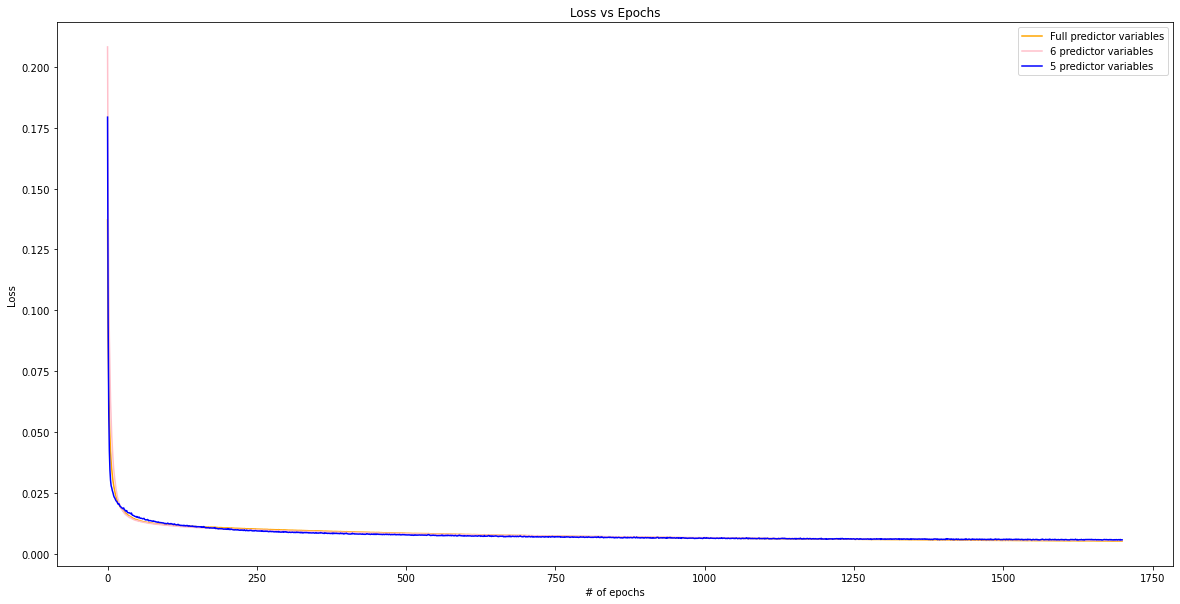

In [ ]:
#Plot all 3 models
plt.figure(figsize=(20,10))
plt.title("Loss vs Epochs")
plt.plot(histories['rfe_full'].history['val_loss'],'orange',label='Full predictor variables')
plt.plot(histories['rfe_6'].history['val_loss'],'pink',label='6 predictor variables')
plt.plot(histories['rfe_5'].history['val_loss'],'blue',label='5 predictor variables')
plt.xlabel('# of epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

## Part B Q3

In [14]:
# eliminate the 2 features that contribute least to the response variable
eliminate = ['Research','SOP']
eliminate_list = list()
for f in eliminate:
    eliminate_list.append(df.columns.tolist().index(f))
eliminate_list.sort()

trainXfinal, testXfinal = np.delete(trainX, obj=eliminate_list, axis=1), np.delete(testX, obj=eliminate_list, axis=1)

print(trainXfinal.shape, testXfinal.shape)

(280, 5) (120, 5)


## 4 Layered Network
```



In [41]:
# learn the network for 4 layers without dropout
histories['four_layers'], model4Used = layers4Model(trainXfinal,trainY,testXfinal,testY,epochs,batch_size,decay, 50, False)

Epoch 1/1700
35/35 - 0s - loss: 0.2027 - mse: 0.1438 - val_loss: 0.1046 - val_mse: 0.0458
Epoch 2/1700
35/35 - 0s - loss: 0.0929 - mse: 0.0341 - val_loss: 0.0874 - val_mse: 0.0287
Epoch 3/1700
35/35 - 0s - loss: 0.0818 - mse: 0.0231 - val_loss: 0.0787 - val_mse: 0.0201
Epoch 4/1700
35/35 - 0s - loss: 0.0761 - mse: 0.0175 - val_loss: 0.0742 - val_mse: 0.0157
Epoch 5/1700
35/35 - 0s - loss: 0.0727 - mse: 0.0142 - val_loss: 0.0718 - val_mse: 0.0134
Epoch 6/1700
35/35 - 0s - loss: 0.0705 - mse: 0.0121 - val_loss: 0.0698 - val_mse: 0.0114
Epoch 7/1700
35/35 - 0s - loss: 0.0690 - mse: 0.0107 - val_loss: 0.0689 - val_mse: 0.0106
Epoch 8/1700
35/35 - 0s - loss: 0.0680 - mse: 0.0098 - val_loss: 0.0678 - val_mse: 0.0097
Epoch 9/1700
35/35 - 0s - loss: 0.0673 - mse: 0.0092 - val_loss: 0.0672 - val_mse: 0.0092
Epoch 10/1700
35/35 - 0s - loss: 0.0666 - mse: 0.0086 - val_loss: 0.0667 - val_mse: 0.0087
Epoch 11/1700
35/35 - 0s - loss: 0.0661 - mse: 0.0082 - val_loss: 0.0662 - val_mse: 0.0083
Epoch 12

In [ ]:
# learn the network for 4 layers with dropout
histories['four_layers_dropout'], model4dUsed = layers4Model(trainXfinal,trainY,testXfinal,testY,epochs,batch_size,decay, 50, True)

## 5 Layers Network

In [ ]:
# learn the network for 5 layers without dropout
histories['five_layers'], model5Used = layers5Model(trainXfinal,trainY,testXfinal,testY,epochs,batch_size,decay, 50, False)

In [ ]:
# learn the network for 5 layers with dropout
histories['five_layers_dropout'], model5dUsed = layers5Model(trainXfinal,trainY,testXfinal,testY,epochs,batch_size,decay, 50, True)

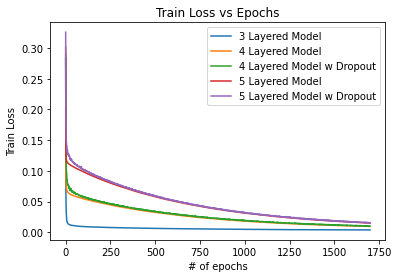

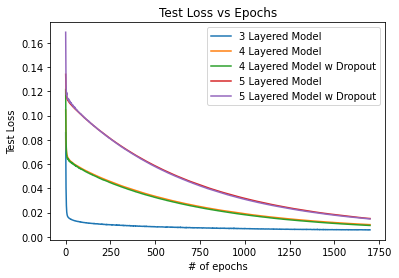

In [44]:
#Plot all 5 models for train
plt.title("Train Loss vs Epochs")
plt.plot(histories['rfe_5'].history['loss'],label='3 Layered Model')
plt.plot(histories['four_layers'].history['loss'],label='4 Layered Model')
plt.plot(histories['four_layers_dropout'].history['loss'],label='4 Layered Model w Dropout')
plt.plot(histories['five_layers'].history['loss'],label='5 Layered Model')
plt.plot(histories['five_layers_dropout'].history['loss'],label='5 Layered Model w Dropout')
plt.xlabel('# of epochs')
plt.ylabel('Train Loss')
plt.legend(loc="best")
plt.show()

#Plot all 5 models for test
plt.title("Test Loss vs Epochs")
plt.plot(histories['rfe_5'].history['val_loss'],label='3 Layered Model')
plt.plot(histories['four_layers'].history['val_loss'],label='4 Layered Model')
plt.plot(histories['four_layers_dropout'].history['val_loss'],label='4 Layered Model w Dropout')
plt.plot(histories['five_layers'].history['val_loss'],label='5 Layered Model')
plt.plot(histories['five_layers_dropout'].history['val_loss'],label='5 Layered Model w Dropout')
plt.xlabel('# of epochs')
plt.ylabel('Test Loss')
plt.legend(loc="best")
plt.show()